## Let's analyse provided data

In [1]:
from pathlib import Path

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
DATA_PATH = Path('../data/heart.csv')
df = pd.read_csv(DATA_PATH)

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
CAT_FEATURES = ['sex', 'cp', 'restecg', 'exang', 'slope', 'ca', 'thal']
NUM_FEATURES = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [6]:
df[NUM_FEATURES].describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


In [7]:
for feat in CAT_FEATURES:
    print(f'Category is {feat}')
    print(df[feat].value_counts())

Category is sex
1    207
0     96
Name: sex, dtype: int64
Category is cp
0    143
2     87
1     50
3     23
Name: cp, dtype: int64
Category is restecg
1    152
0    147
2      4
Name: restecg, dtype: int64
Category is exang
0    204
1     99
Name: exang, dtype: int64
Category is slope
2    142
1    140
0     21
Name: slope, dtype: int64
Category is ca
0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64
Category is thal
2    166
3    117
1     18
0      2
Name: thal, dtype: int64


<AxesSubplot:>

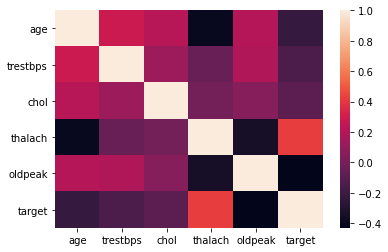

In [8]:
sns.heatmap(df[[*NUM_FEATURES, 'target']].corr())

<AxesSubplot:>

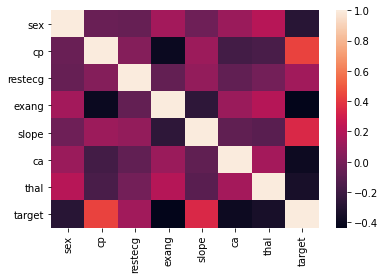

In [9]:
sns.heatmap(df[[*CAT_FEATURES, 'target']].corr())

<AxesSubplot:>

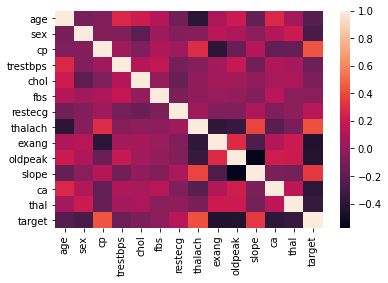

In [10]:
sns.heatmap(df.corr())

# Let's try to use classifiers

In [11]:
X = pd.get_dummies(df.drop('target', axis=1), columns=CAT_FEATURES)

In [12]:
scaler = StandardScaler()
X[NUM_FEATURES] = scaler.fit_transform(df[NUM_FEATURES])

In [13]:
X = X.values
y = df['target'].values

In [14]:
X.shape, y.shape

((303, 29), (303,))

In [15]:
classifiers = [
    LogisticRegression(C=10),
    LogisticRegression(), 
    LogisticRegression(C=0.1),
    GradientBoostingClassifier()
]
for classifier in classifiers:
    cv_scores = cross_val_score(classifier, X, y, scoring='roc_auc', cv=5)
    print(f'{classifier} \t {cv_scores.mean()}, {cv_scores.std()}')

LogisticRegression(C=10) 	 0.9168189834856502, 0.021795352632318084
LogisticRegression() 	 0.9194404361071028, 0.023288824917886468
LogisticRegression(C=0.1) 	 0.9190396023729358, 0.0273320102692519
GradientBoostingClassifier() 	 0.8917187750521084, 0.03780111276494296
